In [156]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [157]:
dataset = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

<h3><b>The ratio of Dead to Survived in the dependent column</b></h3>

([<matplotlib.patches.Wedge at 0x7f440de70eb8>,
 [Text(-0.5862833750297454, 0.9307372369061695, 'Surivival'),
  Text(0.5862832878878331, -0.9307372917979768, 'Death')],
 [Text(-0.3197909318344065, 0.5076748564942742, '67.89%'),
  Text(0.3197908843024544, -0.50767488643526, '32.11%')])

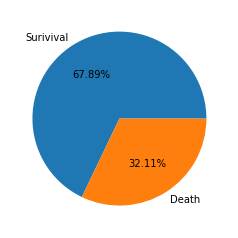

In [158]:
death_events = dataset['DEATH_EVENT']
death_events = death_events.value_counts().tolist()                             #taking count of unique values in death events
death_events_labels = ['Surivival','Death']

plt.pie(x = death_events,labels = death_events_labels, autopct = '%.2f%%')

<h3><b>Correlation matrix</h3></b>

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

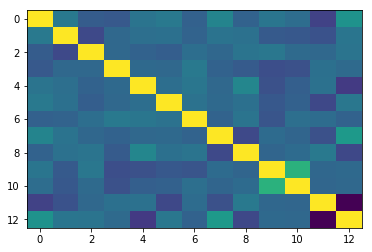

In [159]:
correlation = dataset.corr()
plt.imshow(correlation, aspect='auto')
ax = pylab.subplot()
dataset.columns

<h2><b>Apply learning</h2></b>
<h3><b>Split the data into training, test and validation set</h3></b>

In [193]:
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,-1].values

from sklearn.model_selection import train_test_split
X,X_test,Y,Y_test = train_test_split(X, Y, test_size= 0.20, random_state = 4)
X_train,X_validate,Y_train,Y_validate = train_test_split(X, Y, test_size=0.125, random_state = 2)

model_results = []

<h3><b>Logistic Regression</h3></b>

In [161]:
logistic_regression_C_values = [1, 0.1, 0.01, 0.001, 0.0001]
logistic_regression_results = []

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statistics

for c in logistic_regression_C_values :
    logistic_regression_classifier = LogisticRegression(C=c)
    logistic_regression_classifier.fit(X_train, Y_train)
print('Estimators','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
for i in range(len(random_forest_estimators)) :
    print(random_forest_estimators[i],'\t\t',
          "{:.2f}%".format(random_forest_results[i]['test_accuracy']*100),'\t\t',
          "{:.2f}%".format(random_forest_results[i]['validation_accuracy']*100),'\t',
          "{:.2f}%".format(random_forest_results[i]['total_accuracy']*100),'\n')
    Y_pred_test = logistic_regression_classifier.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    Y_pred_validate = logistic_regression_classifier.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_pred_validate)

    #storing accuracy score for each value of C in a list
    logistic_regression_results.append({'test_accuracy':test_accuracy, 
                                        'validation_accuracy': validation_accuracy, 
                                        'total_accuracy':statistics.mean([test_accuracy,validation_accuracy])
                                        })

In [162]:
print('C','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
i = 0
for i in range(len(logistic_regression_C_values)) :
    print(logistic_regression_C_values[i],'\t',
          "{:.2f}%".format(logistic_regression_results[i]['test_accuracy']*100),'\t',
          "{:.2f}%".format(logistic_regression_results[i]['validation_accuracy']*100),'\t\t',
          "{:.2f}%".format(logistic_regression_results[i]['total_accuracy']*100),'\n')

C 	 Test accuracy 	 Validation accuracy 	 Total accuracy
1 	 81.67% 	 80.00% 		 80.83% 

0.1 	 81.67% 	 80.00% 		 80.83% 

0.01 	 85.00% 	 83.33% 		 84.17% 

0.001 	 85.00% 	 86.67% 		 85.83% 

0.0001 	 81.67% 	 86.67% 		 84.17% 



In [194]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'Logistic regression',
                      'accuracy':logistic_regression_results[3]['total_accuracy']
                          })

<h3><b>KNN</h3></b>

In [164]:
knn_neighbors = [8 , 9, 10, 11, 12, 13]
knn_results = []

from sklearn.neighbors import KNeighborsClassifier

for n in knn_neighbors :
    k_neighbor_classifier = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 1)
    k_neighbor_classifier.fit(X_train, Y_train)

    Y_pred_test = k_neighbor_classifier.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    Y_pred_validate = k_neighbor_classifier.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_pred_validate)

    #storing accuracy score for each value of neighbors in a list
    knn_results.append({'test_accuracy':test_accuracy, 
                        'validation_accuracy': validation_accuracy, 
                        'total_accuracy':statistics.mean([test_accuracy,validation_accuracy])
                        })

In [195]:
print('Neighbors','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
for i in range(len(knn_neighbors)) :
    print(knn_neighbors[i],'\t\t',
          "{:.2f}%".format(knn_results[i]['test_accuracy']*100),'\t\t',
          "{:.2f}%".format(knn_results[i]['validation_accuracy']*100),'\t',
          "{:.2f}%".format(knn_results[i]['total_accuracy']*100),'\n')

Neighbors 	 Test accuracy 	 Validation accuracy 	 Total accuracy
8 		 66.67% 		 70.00% 	 68.33% 

9 		 65.00% 		 70.00% 	 67.50% 

10 		 70.00% 		 76.67% 	 73.33% 

11 		 65.00% 		 66.67% 	 65.83% 

12 		 65.00% 		 76.67% 	 70.83% 

13 		 60.00% 		 70.00% 	 65.00% 



In [196]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'KNN',
                     'accuracy':knn_results[2]['total_accuracy']
                          })

<h3><b>Linear SVM</h3></b>

In [109]:
svm_C_values = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
svm_results = []

from sklearn.svm import SVC
for c in svm_C_values :
    svc_classifier = SVC(kernel = 'linear', C = c)
    svc_classifier.fit(X_train, Y_train)

    Y_pred_test = svc_classifier.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    Y_pred_validate = svc_classifier.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_pred_validate)

    #storing accuracy score for each value of neighbors in a list
    svm_results.append({'test_accuracy':test_accuracy, 
                        'validation_accuracy': validation_accuracy, 
                        'total_accuracy':statistics.mean([test_accuracy,validation_accuracy])
                        })

In [188]:
print('C','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
for i in range(len(svm_C_values)) :
    print(svm_C_values[i],'\t\t',
          "{:.2f}%".format(svm_results[i]['test_accuracy']*100),'\t\t',
          "{:.2f}%".format(svm_results[i]['validation_accuracy']*100),'\t',
          "{:.2f}%".format(svm_results[i]['total_accuracy']*100),'\n')

C 	 Test accuracy 	 Validation accuracy 	 Total accuracy
0.4 		 83.33% 		 86.67% 	 85.00% 

0.5 		 81.67% 		 86.67% 	 84.17% 

0.6 		 83.33% 		 86.67% 	 85.00% 

0.7 		 83.33% 		 86.67% 	 85.00% 

0.8 		 83.33% 		 86.67% 	 85.00% 

0.9 		 81.67% 		 86.67% 	 84.17% 



In [197]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'Linear SVM',
                     'accuracy':svm_results[2]['total_accuracy']
                          })

<h3><b>Naive Bayes</h3></b>

In [170]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

Y_pred_test = naive_bayes_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

Y_pred_validate = naive_bayes_classifier.predict(X_validate)
validation_accuracy = accuracy_score(Y_validate, Y_pred_validate)

total_accuracy = statistics.mean([test_accuracy,validation_accuracy])

In [171]:
print('Test set accuracy : ',"{:.2f}%".format(100*test_accuracy))
print('\nValidation set accuracy : ',"{:.2f}%".format(100*accuracy_score(Y_validate, Y_pred_validate)))
print('\nTotal accuracy : ',"{:.2f}%".format(100*total_accuracy))

Test set accuracy :  76.67%

Validation set accuracy :  86.67%

Total accuracy :  81.67%


In [200]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'Naive Bayes',
                      'accuracy':total_accuracy
                      })

<h3><b>Decision tree</h3></b>

In [116]:
decision_tree_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
decision_tree_results = []

from sklearn.tree import DecisionTreeClassifier
for d in decision_tree_depth :
    decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = d)
    decision_tree_classifier.fit(X_train, Y_train)

    Y_pred_test = decision_tree_classifier.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    Y_pred_validate = decision_tree_classifier.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_pred_validate)

    #storing accuracy score for each value of neighbors in a list
    decision_tree_results.append({'test_accuracy':test_accuracy, 
                                  'validation_accuracy': validation_accuracy, 
                                  'total_accuracy':statistics.mean([test_accuracy,validation_accuracy])
                                  })

In [117]:
print('Max depth','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
for i in range(len(decision_tree_depth)) :
    print(decision_tree_depth[i],'\t\t',
          "{:.2f}%".format(decision_tree_results[i]['test_accuracy']*100),'\t\t',
          "{:.2f}%".format(decision_tree_results[i]['validation_accuracy']*100),'\t',
          "{:.2f}%".format(decision_tree_results[i]['total_accuracy']*100),'\n')

Max depth 	 Test accuracy 	 Validation accuracy 	 Total accuracy
1 		 81.67% 		 90.00% 	 85.83% 

2 		 81.67% 		 90.00% 	 85.83% 

3 		 78.33% 		 90.00% 	 84.17% 

4 		 76.67% 		 83.33% 	 80.00% 

5 		 83.33% 		 86.67% 	 85.00% 

6 		 76.67% 		 90.00% 	 83.33% 

7 		 78.33% 		 86.67% 	 82.50% 

8 		 76.67% 		 90.00% 	 83.33% 

9 		 76.67% 		 90.00% 	 83.33% 

10 		 76.67% 		 90.00% 	 83.33% 



In [201]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'Decision tree',
                      'accuracy':decision_tree_results[4]['total_accuracy']
                     })

<h3><b>Random forest</h3></b>

In [154]:
random_forest_estimators = [5, 7, 10, 12, 15, 18, 20, 22]
random_forest_results = []

from sklearn.ensemble import RandomForestClassifier

for n in random_forest_estimators :
    random_forest_classifier = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 5, max_depth = 4)
    random_forest_classifier.fit(X_train, Y_train)

    Y_pred_test = random_forest_classifier.predict(X_test)
    decision_tree_classifier.fit(X_train, Y_train)

    Y_pred_validate = random_forest_classifier.predict(X_validate)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    #storing accuracy score for each value of neighbors in a list
    random_forest_results.append({'test_accuracy':test_accuracy, 
                                  'validation_accuracy': validation_accuracy, 
                                  'total_accuracy':statistics.mean([test_accuracy,validation_accuracy])
                                  })

In [234]:
print('Estimators','\t','Test accuracy','\t','Validation accuracy','\t','Total accuracy')
for i in range(len(random_forest_estimators)) :
    print(random_forest_estimators[i],'\t\t',
          "{:.2f}".format(random_forest_results[i]['test_accuracy']*100),'\t\t',
          "{:.2f}%".format(random_forest_results[i]['validation_accuracy']*100),'\t\t',
          "{:.2f}%".format(random_forest_results[i]['total_accuracy']*100),'\n')

Estimators 	 Test accuracy 	 Validation accuracy 	 Total accuracy
5 		 76.67 		 90.00% 		 83.33% 

7 		 78.33 		 90.00% 		 84.17% 

10 		 83.33 		 90.00% 		 86.67% 

12 		 86.67 		 90.00% 		 88.33% 

15 		 86.67 		 90.00% 		 88.33% 

18 		 88.33 		 90.00% 		 89.17% 

20 		 86.67 		 90.00% 		 88.33% 

22 		 86.67 		 90.00% 		 88.33% 



In [202]:
#Adding the result with best accuracy to algorithm_results
model_results.append({'model_name':'Random forest',
                      'accuracy':random_forest_results[5]['total_accuracy']
                      })

In [238]:
print("{:<25}".format('Model'),'Accuracy')
for model in model_results :
    print("{:<25}".format(model['model_name']),
          "{:.2f}%".format(model['accuracy']*100))

Model                     Accuracy
Logistic regression       85.83%
KNN                       73.33%
Linear SVM                85.00%
Naive Bayes               81.67%
Decision tree             85.00%
Random dorest             89.17%
